# Original order-of-magnitude calculations

In [ ]:
from astropy import units as u
from astropy import constants as c
import numpy as np
import matplotlib.pyplot as plt

Proposed BH mass = {$10^5, 10^9,10^{12}$} kg

Proposed BH number density = ${(\frac{4}{3} \pi d^3)}^{-1}$ where d = 0.015 pc

BH mass density $\rho_{BH} = M_{BH} {(\frac{4}{3} \pi d^3)}^{-1}$

given homogeneous DM mass density 0.3 GeV / cm3

fraction of DM which is BH = $\frac{\rho_{BH}}{\rho_{DM}}$

and lastly:

Jfactor for galactic center $J_{GC} \sim 10^{19} GeV/cm^2$

### <a id="stef" style="color:black;">Reproducing Stefano's calculations</a>

galactic center BH mass column density $I_{GC} = J_{GC} \frac{\rho_{BH}}{\rho_{DM}} * \frac{1}{M_{BH}} = J_{GC} \frac{1}{\frac{4}{3} \pi d^3}$ *making this equation invariant to the individual mass of the evaporating black hole*

allow nearby BH flux $\phi_{BH} = \frac{\phi_{\gamma}}{4 \pi d^2}$ noting that $\phi_{\gamma}$ represents initial BH flux

by which $\phi_{\gamma} = 4 \pi d^2 \phi_{BH}$

and the galactic center flux $\phi_{GC} = \phi_{\gamma} \frac{J_{GC}}{\frac{4}{3} \pi d^3} = 4 \pi d^2 \phi_{BH} \frac{J_{GC}}{\frac{4}{3} \pi d^3}$

which, again, the signal from the nearby BH is $\phi_{BH} = \frac{\phi_{\gamma}}{4 \pi d^2}$ such that we want the ratio of signals 

$\frac{\phi_{GC}}{\phi_{BH}} = 4 \pi d^2 \frac{J_{GC}}{\frac{4}{3} \pi d^3}$ cancelling out the individual BH flux

Note: I keep the d's separate as they are composed of different units when calculated numerically below

In [16]:
# I go through the steps of introducing M_bh and cancelling it out.
# The function at the end efficiently skips this step.
M_bh = 10**7 * u.kg

rho_bh = M_bh / (4/3* (3.14159) * (0.015 * u.pc)**3)

#fracBH = rho_bh / (0.01 * c.M_sun * u.pc**-3)
fracBH = rho_bh / (0.3 * u.GeV / (u.cm**3) )

J = 10**19 * u.GeV * u.cm**(-2) 

I_GC = J * fracBH / M_bh

I_GC = I_GC.to('1 / cm2')

print('Signal from galactic center: ',I_GC)

I_bh = 1 / (4* (3.14159) * (0.015 * u.pc)**2)

I_bh = I_bh.to('1 / cm2')

print('Signal from nearby BH : ',I_bh)

print('Flux ratio: %.2f'%(I_GC/I_bh))

print('Req\'d distance for I_GC/I_bh = 1: ',3 * J)

2.3578530003620492e+24 cm / pc3
Signal from galactic center:  8.025370477243687e-32 1 / cm2
Signal from nearby BH :  3.714555864689924e-35 1 / cm2
Flux ratio: 2160.52
Req'd distance for I_GC/I_bh = 1:  3e+19 GeV / cm2


In [4]:
def flux_ratio(J , DM_density, BH_density):
    
    # Unit Check
    J = J.to('GeV / cm2')
    DM_density = DM_density.to('GeV / cm3')
    BH_density = BH_density.to('cm')
    
    I_target = J / (DM_density * 4/3* (3.14159) * BH_density**3)
    I_target = I_target.to('1 / cm2')
    
    I_bh = 1 / (4* (3.14159) * BH_density**2)
    I_bh = I_bh.to('1 / cm2')
    
    return I_target/I_bh

print('again, we find flux ratio to be %.2f'%flux_ratio(10**19 * u.GeV / u.cm**2, 0.3 * u.GeV / u.cm**3, (0.015 * u.pc) ))

again, we find flux ratio to be 2160.52


### More precision with measured values

Precision can be improved for values of the assumed homogeneous DM density and the GC J factor.

$\rho_{DM}$: [Determination of the local dark matter density in our Galaxy](https://www.aanda.org/articles/aa/pdf/2010/01/aa13381-09.pdf)

$J_{GC}$: [Jeltema, Profumo](https://arxiv.org/abs/1408.1699)

In [5]:
DM_density = [0.2, 0.4] * u.GeV / u.cm**3

unit = 10**18 * u.GeV / u.cm**2
J_factors = {
    'BUR_PN': 3.91, 'BUR_MOS': 3.77,
    'NFW_PN': 12.5, 'NFW_MOS': 12.2,
    'EIN_PN': 14.9, 'EIN_MOS': 14.4
}

def test_limits(density):
    for k,v in J_factors.items():
        print('%s %.2f'%(k,flux_ratio(v*unit, density, 0.015*u.pc )))
        
print('Lower bound DM density:')
test_limits(DM_density[0])

print('\nUpper bound:')
test_limits(DM_density[1])

Lower bound DM density:
BUR_PN 1267.14
BUR_MOS 1221.77
NFW_PN 4050.97
NFW_MOS 3953.75
EIN_PN 4828.76
EIN_MOS 4666.72

Upper bound:
BUR_PN 633.57
BUR_MOS 610.89
NFW_PN 2025.49
NFW_MOS 1976.88
EIN_PN 2414.38
EIN_MOS 2333.36


$M = M_{10} \times 10^{10}g \to \frac{dM}{dM_{10}} = 10^{10}g$

$\frac{dM_{10}}{dt} = -5.34 \times 10^{-5} f(M) M_{10}^{-2} s^{-1}$ where f(M) = 0.06 * 2

$\frac{dM_{10}}{dt}\frac{dM}{dM_{10}} = \frac{dM}{dt} = 10^{10}g \times (-5.34 \times 10^{-5}) f(M) M_{10}^{-2} s^{-1}$

$\approx -5.34 \times 10^4 g/s M_{10}^{-2}$

In [6]:
ddt_M = 10**10 * u.g * -5.34 * 10**-5 * (0.06 * 2) / u.s # * M_10^-2

print('%2e %s M_10^-2'%(ddt_M.value, ddt_M.unit))

-6.408000e+04 g / s M_10^-2


$E_\gamma = T \approx 1.06 TeV * M_{10}^{-1}$

$E_\gamma \times |\frac{dM}{dt}| = \phi_\gamma \approx 1.06 TeV \times 5.34 \times 10^4 g/s M_{10}^{-3}$

In [7]:
TeV = 5*10**20 *u.g

flux = 1.06 * TeV * np.abs(ddt_M) # * M_10^-3

print('%2e %s M_10^-3'%(flux.value, flux.unit))

3.396240e+25 g2 / s M_10^-3


<!-- recall from above $\frac{\phi_{GC}}{\phi_{BH}} = 4 \pi d^2 \frac{J_{GC}}{\frac{4}{3} \pi d^3}$ which we defined as flux_ratio() -->

from $\phi_\gamma$, allow $M_{10}^{-3} = (\frac{10^{10}g}{M_{EBH}})^3$

such that $\phi_\gamma \approx 3.3 \times 10^{25} \frac{10^{30}g^3}{M_{EBH}^3}$

for meaningful detection, $\frac{|\phi_\gamma|}{4\pi d^2} < 10^{-15} cm^{-2}s^{-1}$ where RHS is telescope resolution

which can be solved for $d < (\frac{4 \pi 10^{-15} cm^{-2} s^{-1}}{|\phi_\gamma|})^\frac{1}{2}$

In [8]:
flux_M = lambda M: flux * 10**30 * u.g**3 / M**(3)

func_Md = lambda M,d: flux_M(M) / (4* 3.14159 * d**2)

func_M = lambda M: np.sqrt(4 * 3.14159 * 10**(-15) * u.cm**-2 * u.s**-1 / flux_M(M))

# for example, for d=20cm, M=10**7kg
print(func_Md(M = 10**7 * u.kg, d = 20 * u.cm).to('g2 / cm2 s'))

6.756610506144978e+21 g2 / (cm2 s)


In the following figure, we plot the above equation for d(M), for distance vs. BH mass.

Any black holes in the domain BELOW the blue line are discoverable by a telescope of resolution >$10^{-15} cm^{-2}s^{-1}$

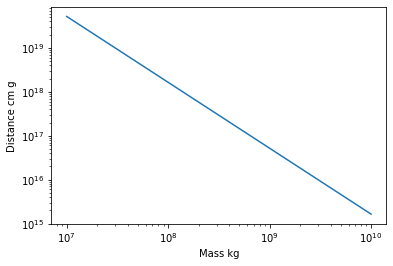

In [11]:
M = np.linspace(10**10, 10**12) * u.kg

F_d = 1/func_M(M).to('1 / (cm g)')
plt.plot([5*1e11,5*1e11],[min(F_d), max(F_d)], label=r'5\times 10^{14}g')

plt.loglog(M, F_d, label='Distance maximum')
plt.xlabel('Mass kg')
plt.ylabel('Distance %s'%F_d.unit)
plt.legend()
plt.show()

---- 